In [38]:
import tensorflow as tf

In [39]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

In [40]:
tf.__version__

'2.17.1'

In [41]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [42]:
logdir='log'

In [43]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28,1))
test_images = test_images.reshape((10000, 28, 28,1 ))

train_images, test_images = train_images / 255.0, test_images / 255.0


In [44]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [46]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_images, y=train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.8967 - loss: 0.3364 - val_accuracy: 0.9834 - val_loss: 0.0545
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 53ms/step - accuracy: 0.9855 - loss: 0.0472 - val_accuracy: 0.9889 - val_loss: 0.0344
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 105s 33ms/step - accuracy: 0.9895 - loss: 0.0326 - val_accuracy: 0.9904 - val_loss: 0.0327
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 41ms/step - accuracy: 0.9925 - loss: 0.0246 - val_accuracy: 0.9909 - val_loss: 0.0315
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 31ms/step - accuracy: 0.9939 - loss: 0.0208 - val_accuracy: 0.9888 - val_loss: 0.0379


In [50]:
y_true=test_labels
y_pred_prob = model.predict(test_images)
y_pred = np.argmax(y_pred_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


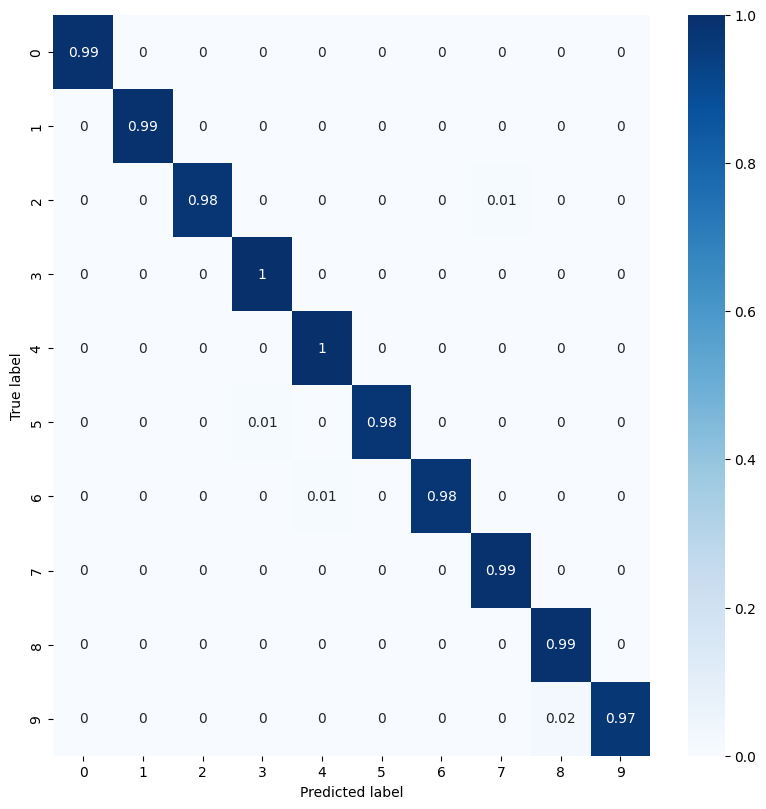

In [51]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

classes = [str(i) for i in range(10)]
con_mat_df = pd.DataFrame(con_mat_norm, index=classes, columns=classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Acurácia: {accuracy:.2f}")
print(f"Sensibilidade (Recall): {recall:.2f}")
print(f"F-score: {f1:.2f}")

Acurácia: 0.99
Sensibilidade (Recall): 0.99
F-score: 0.99


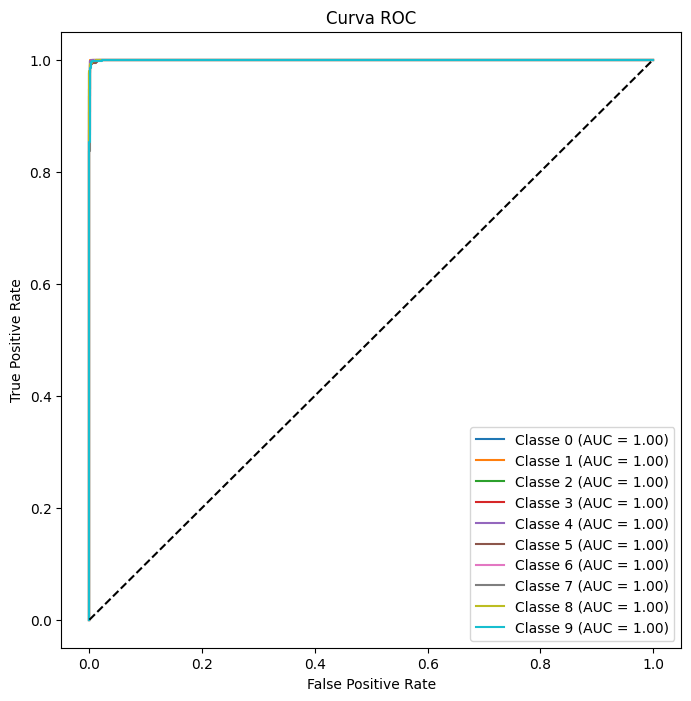

In [53]:
y_true_bin = label_binarize(y_true, classes=[i for i in range(10)])
n_classes = y_true_bin.shape[1]

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Classe {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()
